In [156]:
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
import datetime

def build_dataset(name):
    f = open(name+'_incidents_summer_2014.csv')
    csv_f = csv.reader(f)
    data = {}
    i = 0
    for row in csv_f:
        if i == 0:
            i = i + 1
            elements = row
            data['Elements'] = elements
            for el in elements:
                data[el] = []
        else:
            pass
            num = 0
            for el in elements:
                data[el].append(row[num])
                num = num + 1
    f.close
    return data

seattle = build_dataset('seattle')
sanfrancisco = build_dataset('sanfrancisco')

In [175]:
def hours_sf():
    n_el = len(sanfrancisco['Category'])
    sanfrancisco['Hour'] = []#np.zeros(n_el)
    for k in range(n_el):
        if sanfrancisco['Time'][k][0:2] == '00':
            sanfrancisco['Hour'].append('24')
        else:
            sanfrancisco['Hour'].append(sanfrancisco['Time'][k][0:2])
def hours_seattle():
    n_el = len(seattle['Occurred Date or Date Range Start'])
    seattle['Hour'] = []#np.zeros(n_el)
    for k in range(n_el):
        if seattle['Occurred Date or Date Range Start'][k][20:22] == 'AM':
            seattle['Hour'].append(seattle['Occurred Date or Date Range Start'][k][11:13])
        elif seattle['Occurred Date or Date Range Start'][k][20:22] == 'PM':
            time = str(int(seattle['Occurred Date or Date Range Start'][k][11:13])+12)
            seattle['Hour'].append(time)
def hour_freq(data):
    labels = set(data['Hour'])
    tot = len(data['Hour'])
    fracs = np.zeros(len(labels))
    k = 0
    for cat in labels:
        fracs[k] = float(data['Hour'].count(cat))/float(tot)
        k = k + 1
    fracs_sort, labels_sort = zip(*sorted(zip(fracs, labels), \
          key=operator.itemgetter(1)))
    return labels_sort, fracs_sort

def month_sf():
    n_el = len(sanfrancisco['Date'])
    sanfrancisco['Month'] = []
    for k in range(n_el):
        sanfrancisco['Month'].append(sanfrancisco['Date'][k][0:6])
def month_seattle():
    n_el = len(seattle['Occurred Date or Date Range Start'])
    seattle['Month'] = []
    for k in range(n_el):
        seattle['Month'].append(seattle['Occurred Date or Date Range Start'][k][0:6])    
def month_freq(data):
    labels = set(data['Month'])
    tot = len(data['Month'])
    fracs = np.zeros(len(labels))
    k = 0
    for cat in labels:
        fracs[k] = float(data['Month'].count(cat))/float(tot)
        k = k + 1
    fracs_sort, labels_sort = zip(*sorted(zip(fracs, labels), \
          key=operator.itemgetter(1)))
    return labels_sort, fracs_sort
def day_seattle():
    n_el = len(seattle['Occurred Date or Date Range Start'])
    seattle['DayOfWeek'] = []
    for k in range(n_el):
        seattle['DayOfWeek'].append(datetime.datetime.strptime(seattle['Occurred Date or Date Range Start'][k][0:10], '%m/%d/%Y').strftime('%A'))    
def day_freq(data):
    labels = set(data['DayOfWeek'])
    tot = len(data['DayOfWeek'])
    fracs = np.zeros(len(labels))
    k = 0
    for cat in labels:
        fracs[k] = float(data['DayOfWeek'].count(cat))/float(tot)
        k = k + 1
    dic_day = {'Monday':1 , 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
    day_lab = []
    for day in labels:
        day_lab.append(dic_day[day]) 
    fracs_sort, day_sort= zip(*sorted(zip(fracs, day_lab), \
          key=operator.itemgetter(1)))
    labels_sort, day_sort= zip(*sorted(zip(labels, day_lab), \
          key=operator.itemgetter(1)))
    return labels_sort, fracs_sort  

hours_sf()
hours_seattle()
month_sf()
month_seattle()
day_seattle()
hour_labels_sf,hour_freq_sf = hour_freq(sanfrancisco)
hour_labels_seattle,hour_freq_seattle = hour_freq(seattle)
month_labels_sf,month_freq_sf = month_freq(sanfrancisco)
month_labels_seattle,month_freq_seattle = month_freq(seattle)
day_labels_sf,day_freq_sf = day_freq(sanfrancisco)
day_labels_seattle,day_freq_seattle = day_freq(seattle)

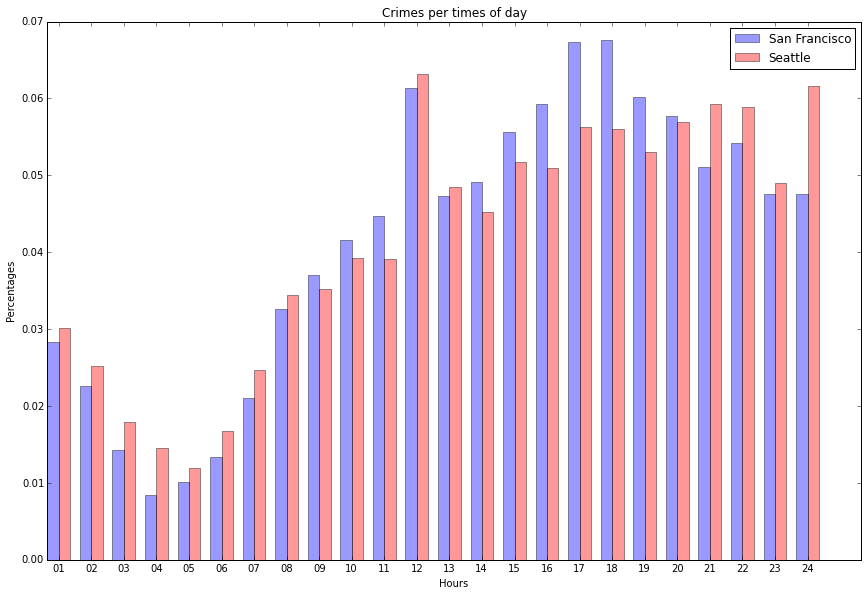

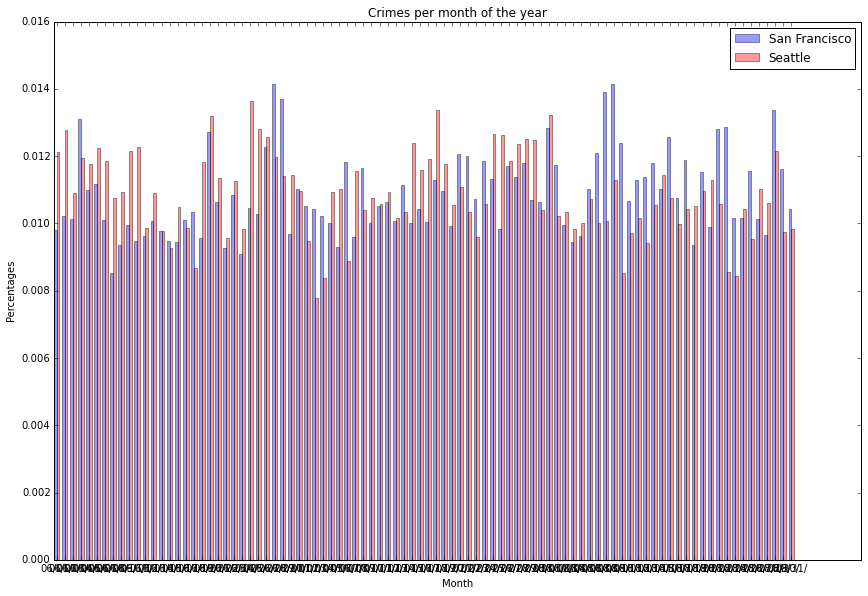

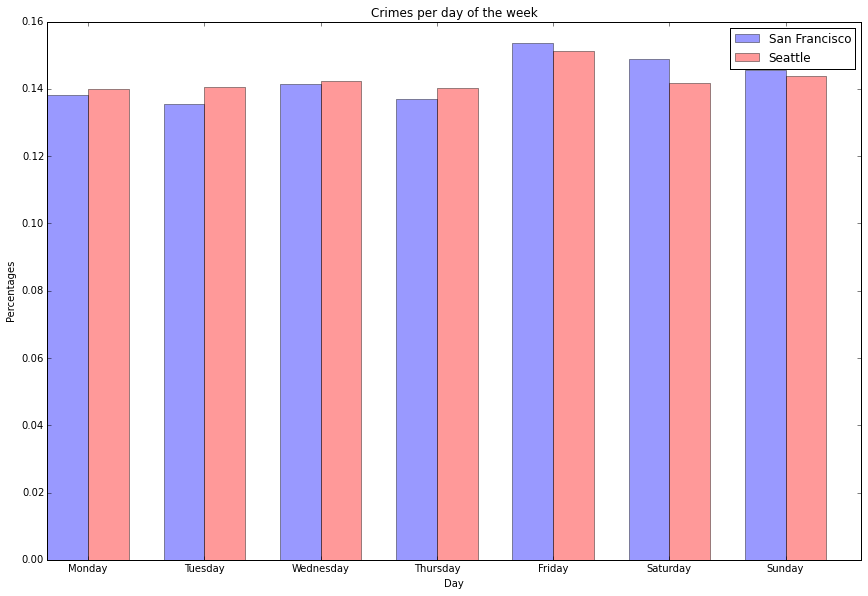

In [180]:
def bar_plot(label_sf,freq_sf,label_sea,freq_sea,xlab,title):
    n_groups = len(label_sf)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    rects1 = plt.bar(index, freq_sf, bar_width,alpha=opacity,color='b',label='San Francisco')
    rects2 = plt.bar(index + bar_width, freq_sea, bar_width,alpha=opacity,color='r',label='Seattle')

    plt.xlabel(xlab)
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, list(label_sea))
    plt.legend()
    plt.tight_layout()
    fig.subplots_adjust(right=2,top=2)
bar_plot(hour_labels_sf,hour_freq_sf,hour_labels_seattle,hour_freq_seattle,'Hours','Crimes per times of day')
bar_plot(month_labels_sf,month_freq_sf,month_labels_seattle,month_freq_seattle,'Month','Crimes per month of the year')
bar_plot(day_labels_sf,day_freq_sf,day_labels_seattle,day_freq_seattle,'Day','Crimes per day of the week')

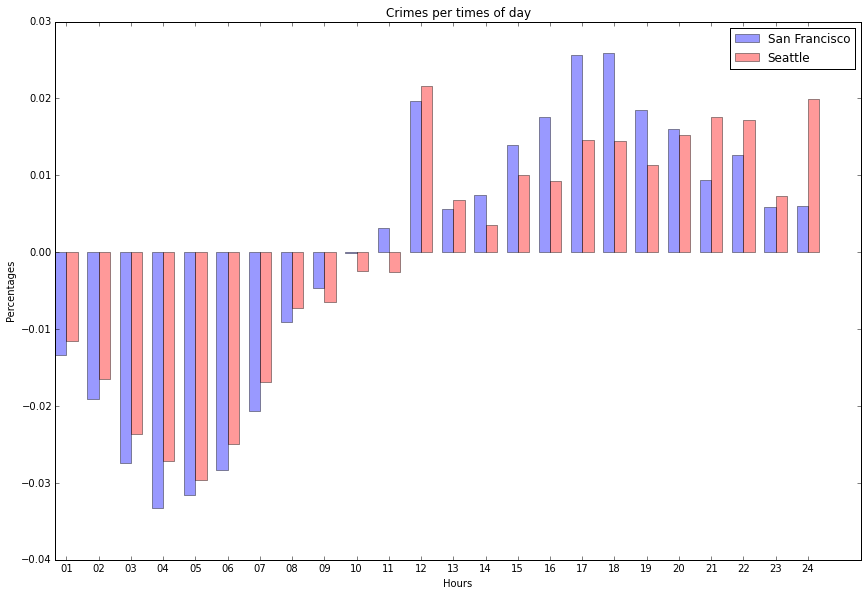

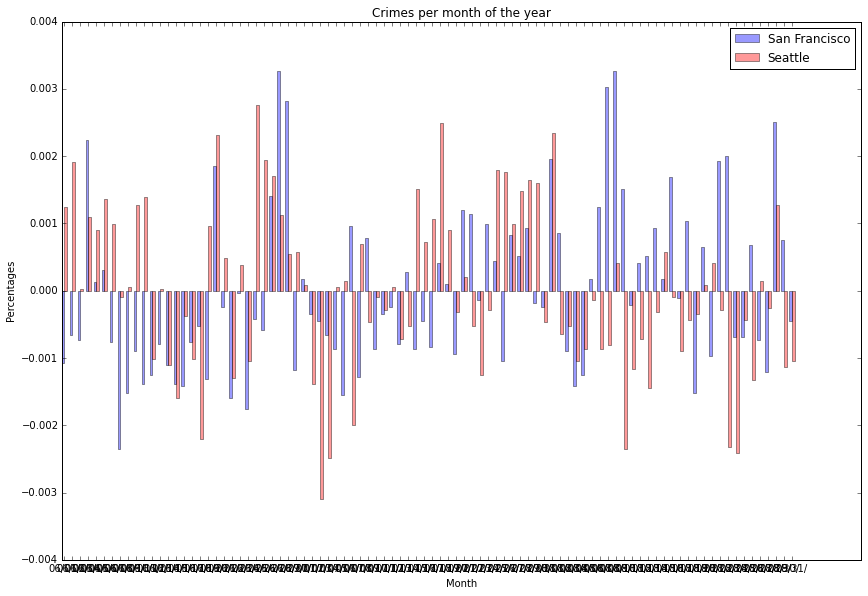

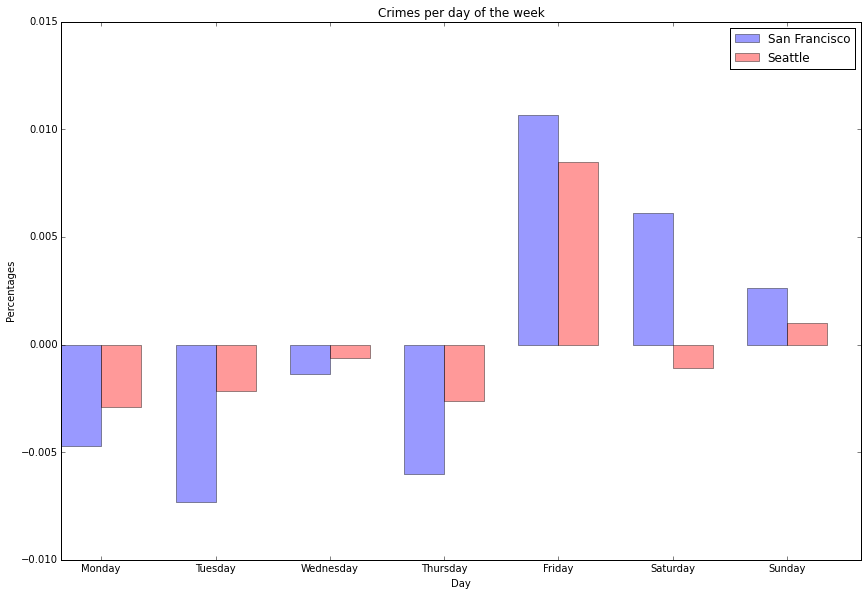

In [188]:
def bar_plot_freq(label_sf,freq_sf,label_sea,freq_sea,xlab,title):
    n_groups = len(label_sf)
    freq_sf1 = np.zeros(n_groups)
    freq_sea1 = np.zeros(n_groups)
    for k in range(n_groups):
        freq_sf1[k] = freq_sf[k] - float(1)/float(n_groups)
        freq_sea1[k] = freq_sea[k] - float(1)/float(n_groups)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    rects1 = plt.bar(index, freq_sf1, bar_width,alpha=opacity,color='b',label='San Francisco')
    rects2 = plt.bar(index + bar_width, freq_sea1, bar_width,alpha=opacity,color='r',label='Seattle')

    plt.xlabel(xlab)
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, list(label_sea))
    plt.legend()
    plt.tight_layout()
    fig.subplots_adjust(right=2,top=2)
bar_plot(hour_labels_sf,hour_freq_sf,hour_labels_seattle,hour_freq_seattle,'Hours','Crimes per times of day')
bar_plot(month_labels_sf,month_freq_sf,month_labels_seattle,month_freq_seattle,'Month','Crimes per month of the year')
bar_plot(day_labels_sf,day_freq_sf,day_labels_seattle,day_freq_seattle,'Day','Crimes per day of the week')